<a href="https://colab.research.google.com/github/David-jano/Traffic_sign_detection_CNN/blob/main/Traffic_sign_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First, restart the runtime (from the Runtime menu > Restart Runtime), then run:
import zipfile

zip_path = '/content/AI-Traffic-sign-Recognition-using-CNN-main.zip'
extract_path = '/content/AI-Traffic-sign-Recognition-using-CNN-main'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction done!")


✅ Extraction done!


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [ ]:
data_dir = '/content/AI-Traffic-sign-Recognition-using-CNN-main/AI-Traffic-sign-Recognition-using-CNN-main/gtsrb'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [ ]:
NUM_CATEGORIES = len(os.listdir(data_dir))
NUM_CATEGORIES

43

In [ ]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

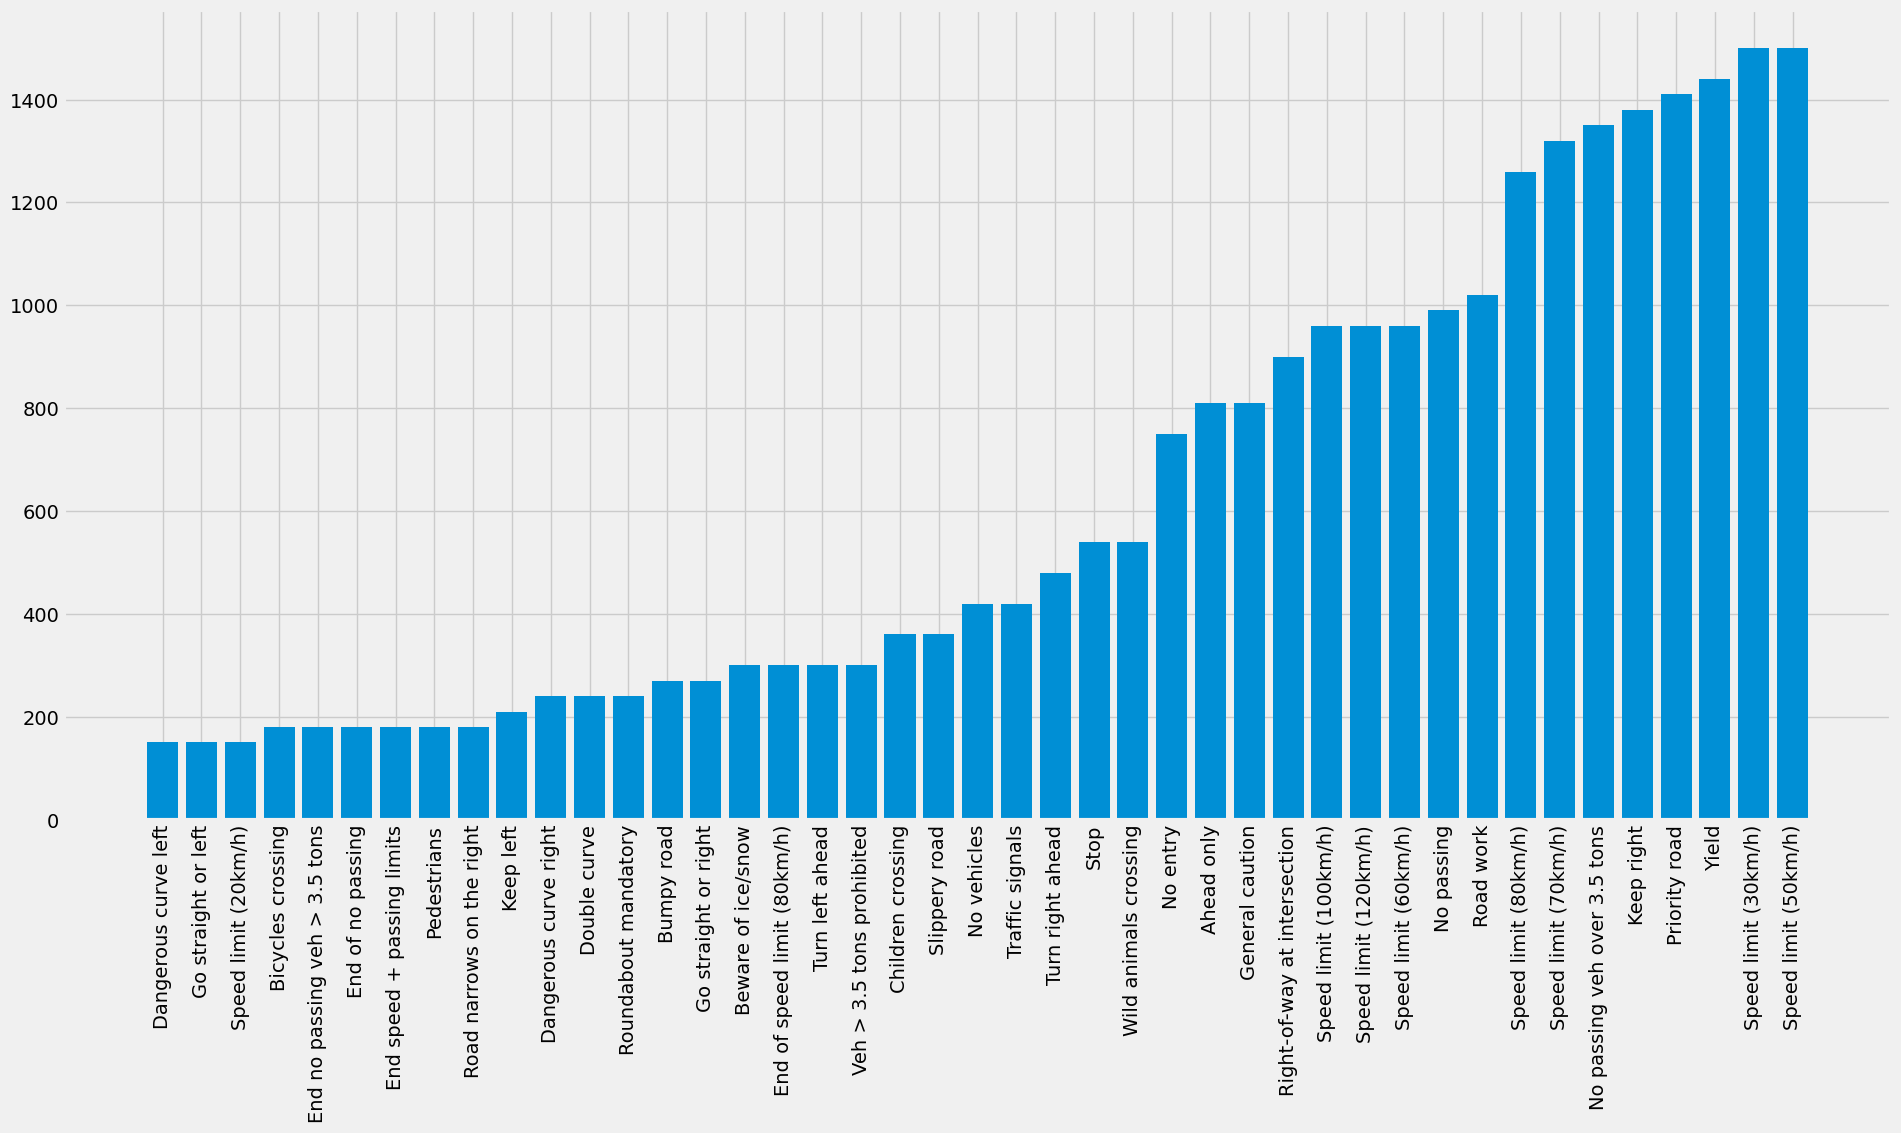

In [ ]:
folders = os.listdir(data_dir)

data_number = []
class_num = []

for folder in folders:
    data_files = os.listdir(data_dir + '/' + folder)
    data_number.append(len(data_files))
    class_num.append(classes[int(folder)])

# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(data_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
data_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))
plt.bar(class_num, data_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [ ]:
import os
import cv2
import numpy as np

data = []
labels = []

for i in range(NUM_CATEGORIES):
    path = os.path.join(data_dir, str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image_path = os.path.join(path, a)
            image = cv2.imread(image_path)

            if image is None:
                print(f"Error loading image: {image_path}")
                continue

            image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Unexpected error for image {image_path}: {e}")


In [ ]:
images = np.array(data)
labels = np.array(labels)

print("✅ Images shape:", images.shape)
print("✅ Labels shape:", labels.shape)


✅ Images shape: (26640, 30, 30, 3)
✅ Labels shape: (26640,)


In [ ]:
TEST_SIZE = 0.1
Train_SIZE = 0.7
Validate_SIZE = 0.2
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(
        np.array(images), np.array(labels), train_size=Train_SIZE+Validate_SIZE, test_size=TEST_SIZE, random_state=42
    )

In [ ]:
X_trainn = x_train/255
x_testt = x_test/255

print("X_train.shape", X_trainn.shape)
print("X_test.shape", x_testt.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

X_train.shape (23975, 30, 30, 3)
X_test.shape (2664, 30, 30, 3)
y_train.shape (23975, 43)
y_test.shape (2664, 43)


In [ ]:
def get_model(X_train):
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """
    # Building the model
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(43, activation='softmax'))

    # Compilation of the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return  model

In [ ]:
# Get a compiled neural network
model = get_model(x_train)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

None


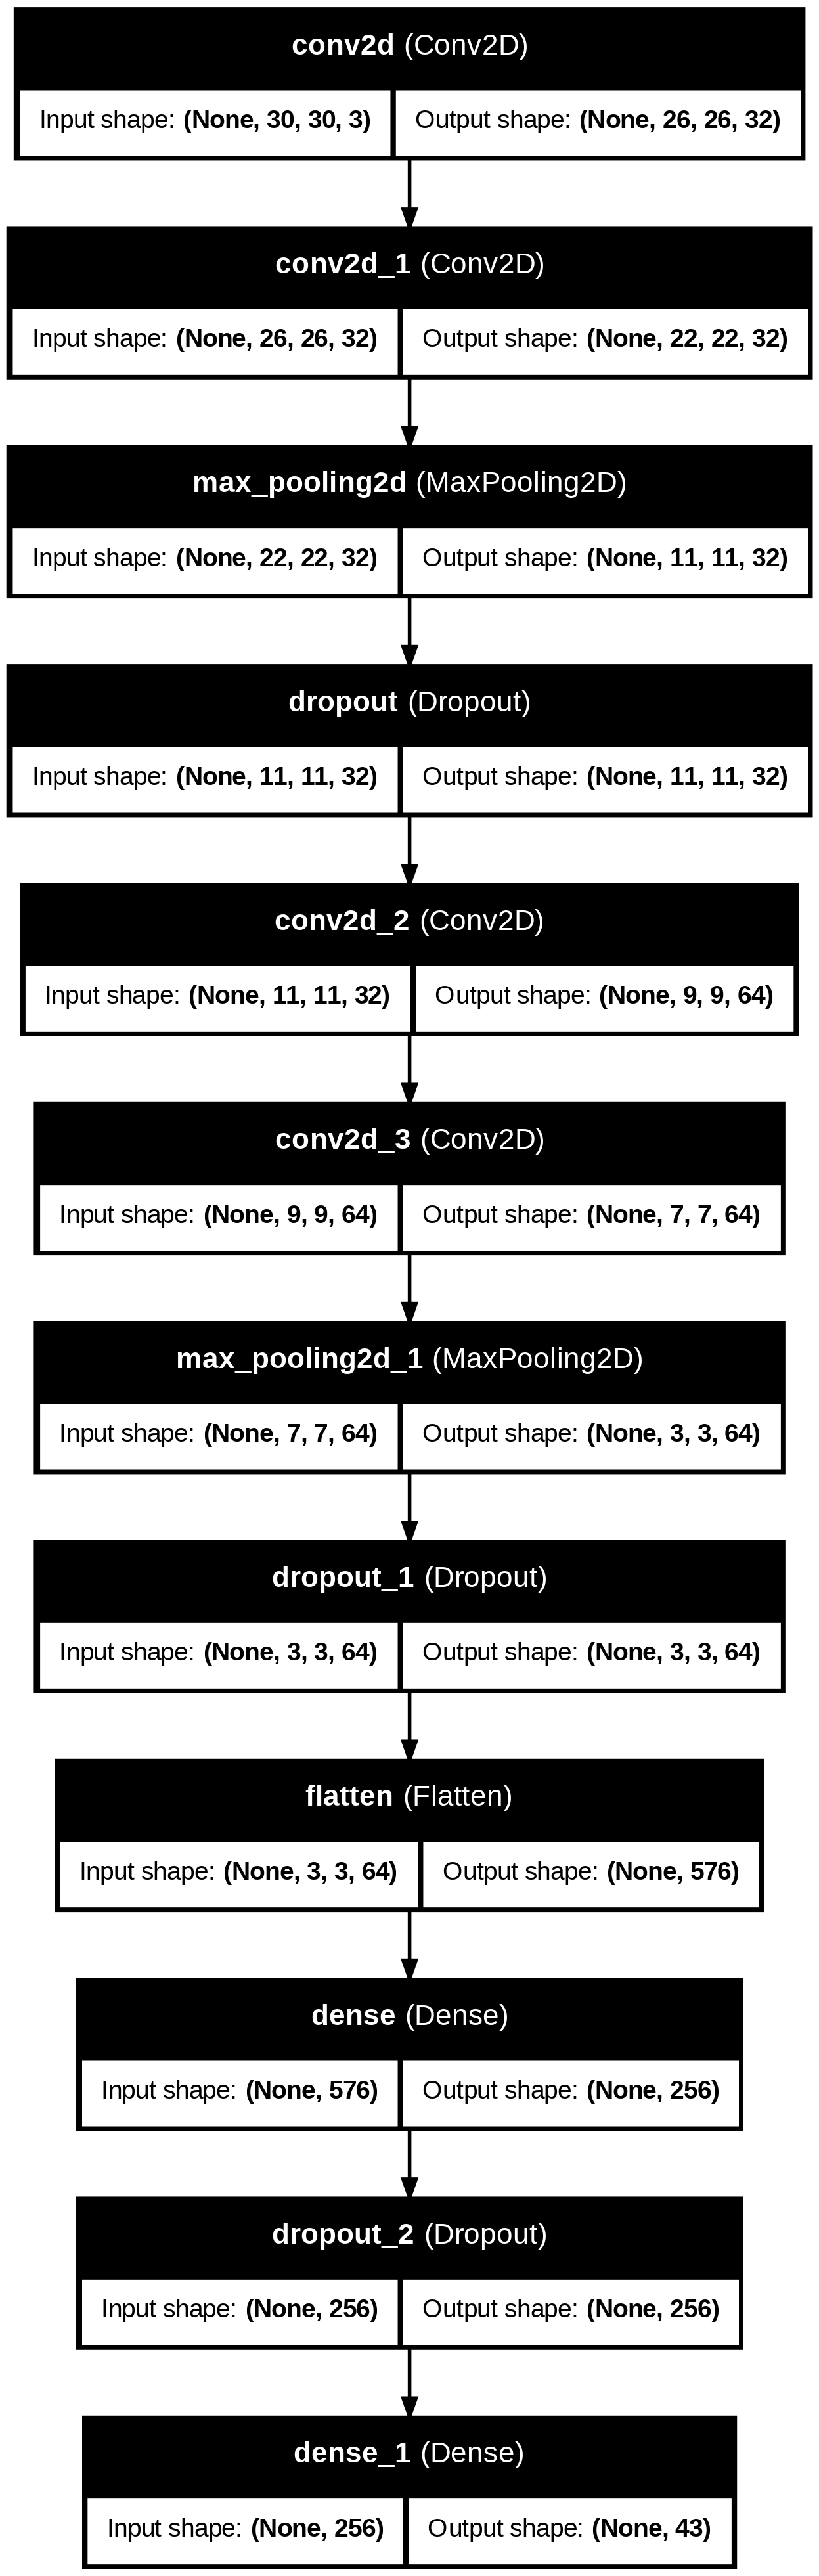

In [ ]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
my_callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2),
        tf.keras.callbacks.ModelCheckpoint(filepath='Saved_model.h5'),
        tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    ]
EPOCHS = 10
# Fit model on training data
history =model.fit(x_train, y_train,batch_size=32, epochs=EPOCHS, validation_split=0.2, verbose=1, callbacks=my_callbacks)
# Save model to file
model.save("Saved_model.h5")

Epoch 1/10
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.2307 - loss: 3.6436

600/600 ━━━━━━━━━━━━━━━━━━━━ 83s 131ms/step - accuracy: 0.2313 - loss: 3.6393 - val_accuracy: 0.7952 - val_loss: 0.8271
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.6649 - loss: 1.1630

600/600 ━━━━━━━━━━━━━━━━━━━━ 77s 129ms/step - accuracy: 0.6650 - loss: 1.1628 - val_accuracy: 0.8809 - val_loss: 0.4522
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7464 - loss: 0.8628

600/600 ━━━━━━━━━━━━━━━━━━━━ 79s 131ms/step - accuracy: 0.7464 - loss: 0.8626 - val_accuracy: 0.9047 - val_loss: 0.3320
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.8245 - loss: 0.5897

600/600 ━━━━━━━━━━━━━━━━━━━━ 81s 129ms/step - accuracy: 0.8246 - loss: 0.5897 - val_accuracy: 0.9353 - val_loss: 0.2210
Epoch 5/10
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.8599 - loss: 0.4712

600/600 ━━━━━━━━━━━━━━━━━━━━ 80s 126ms/step - accuracy: 0.8599 - loss: 0.4711 - val_accuracy: 0.9512 - val_loss: 0.1755
Epoch 6/10
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.8849 - loss: 0.3918

600/600 ━━━━━━━━━━━━━━━━━━━━ 80s 123ms/step - accuracy: 0.8849 - loss: 0.3917 - val_accuracy: 0.9575 - val_loss: 0.1480
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.9022 - loss: 0.3425

600/600 ━━━━━━━━━━━━━━━━━━━━ 85s 128ms/step - accuracy: 0.9022 - loss: 0.3424 - val_accuracy: 0.9616 - val_loss: 0.1446
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9092 - loss: 0.3023

600/600 ━━━━━━━━━━━━━━━━━━━━ 84s 132ms/step - accuracy: 0.9092 - loss: 0.3023 - val_accuracy: 0.9748 - val_loss: 0.0968
Epoch 9/10
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.9178 - loss: 0.2733

600/600 ━━━━━━━━━━━━━━━━━━━━ 79s 127ms/step - accuracy: 0.9178 - loss: 0.2733 - val_accuracy: 0.9796 - val_loss: 0.0791
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.9233 - loss: 0.2566

600/600 ━━━━━━━━━━━━━━━━━━━━ 87s 137ms/step - accuracy: 0.9233 - loss: 0.2566 - val_accuracy: 0.9796 - val_loss: 0.0673


In [ ]:
saved_model = load_model('Saved_model.h5')
_, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.985, Test: 0.984


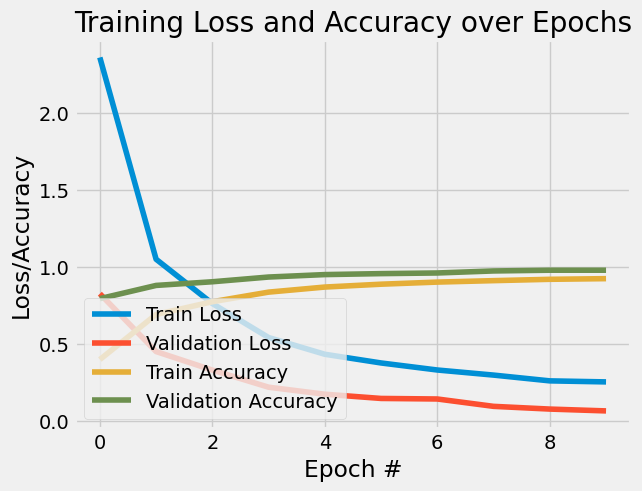

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
N = np.arange(0, 10)  # Match the number of epochs

plt.plot(N, history.history["loss"], label="Train Loss")
plt.plot(N, history.history["val_loss"], label="Validation Loss")
plt.plot(N, history.history["accuracy"], label="Train Accuracy")
plt.plot(N, history.history["val_accuracy"], label="Validation Accuracy")

plt.title("Training Loss and Accuracy over Epochs")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Predict class probabilities
predictions = model.predict(x_test, batch_size=32)

# Convert probabilities to predicted class indices
pred_classes = np.argmax(predictions, axis=1)

# True class labels
true_classes = np.argmax(y_test, axis=1)

# Convert your labels to a sorted list (not a set) to use as class names
labels = [
    'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)',
    'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)',
    'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)',
    'No passing', 'No passing veh over 3.5 tons', 'Right-of-way at intersection',
    'Priority road', 'Yield', 'Stop', 'No vehicles',
    'Veh > 3.5 tons prohibited', 'No entry', 'General caution',
    'Dangerous curve left', 'Dangerous curve right', 'Double curve',
    'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work',
    'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing',
    'Beware of ice/snow', 'Wild animals crossing', 'End speed + passing limits',
    'Turn right ahead', 'Turn left ahead', 'Ahead only',
    'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left',
    'Roundabout mandatory', 'End of no passing', 'End no passing veh > 3.5 tons'
]

print("[INFO] evaluating network...")
print(classification_report(true_classes, pred_classes, target_names=labels))


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
[INFO] evaluating network...
                               precision    recall  f1-score   support

         Speed limit (20km/h)       1.00      1.00      1.00        10
         Speed limit (30km/h)       0.99      0.99      0.99       136
         Speed limit (50km/h)       0.99      0.97      0.98       159
         Speed limit (60km/h)       0.97      1.00      0.99       101
         Speed limit (70km/h)       0.98      0.99      0.99       125
         Speed limit (80km/h)       0.98      0.96      0.97       134
  End of speed limit (80km/h)       1.00      1.00      1.00        33
        Speed limit (100km/h)       0.99      0.97      0.98        94
        Speed limit (120km/h)       0.98      0.99      0.98        94
                   No passing       0.97      1.00      0.99       109
 No passing veh over 3.5 tons       0.99      0.99      0.99       124
 Right-of-way at intersection       0.97      0.98      0.97        91
       

84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step


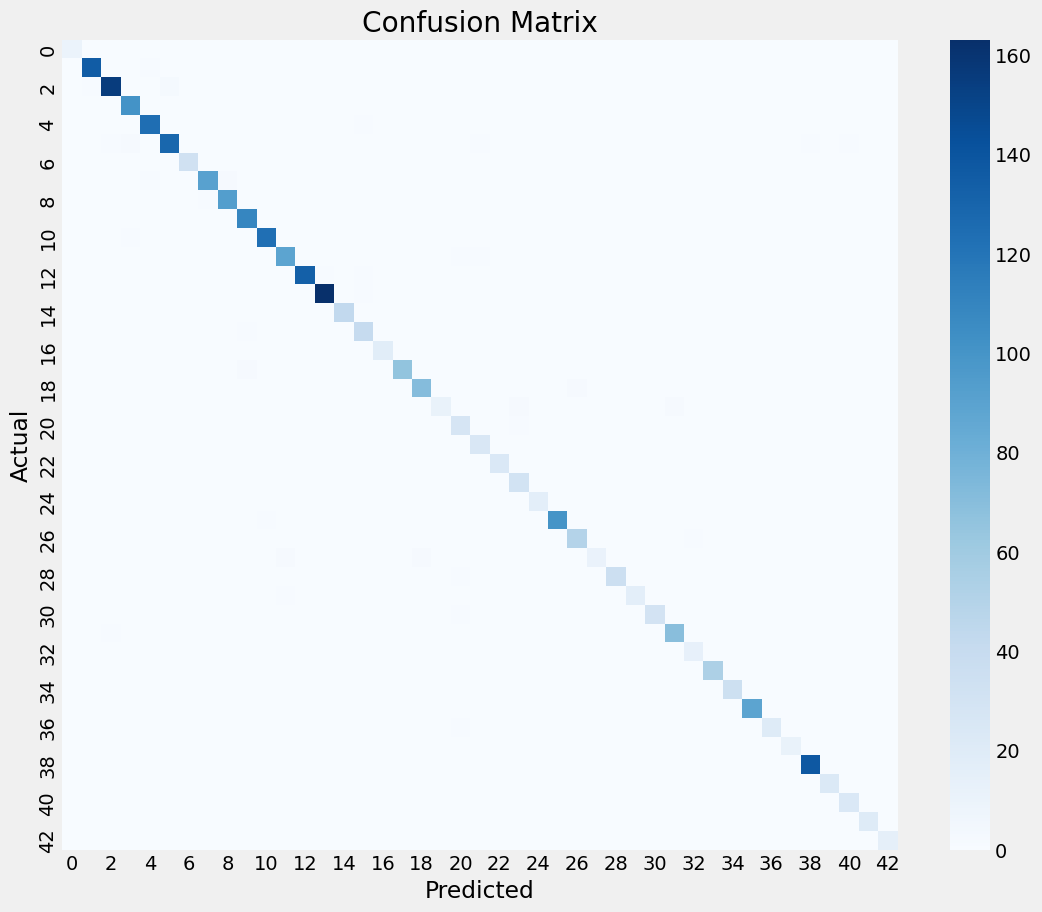

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure you've already predicted:
predictions = model.predict(x_test, batch_size=32)
pred_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
sns.heatmap(cm, annot=False, cmap='Blues', fmt='g',
            xticklabels=labels, yticklabels=labels)
